# Data Download
1. Download from UCI website
2. Output them as .txt file




In [ ]:
!gdown https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
!gdown https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test
!gdown https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data
f = open("adult.test",'r')
content = f.readlines()
content=content[1::]
f2 = open('adult_test.txt','w')
f2.write(''.join(content))
f = open("adult.data",'r')
content = f.readlines()
f2 = open('adult_data.txt','w')
f2.write(''.join(content))
f = open("nursery.data",'r')
content = f.readlines()
f2 = open('nursery.txt','w')
f2.write(''.join(content))


# NOTE: If the codes above don't work, files 'adult_data.txt','adult_test.txt','nursery.txt' can be download from the links below from Google Drive.
# !gdown https://drive.google.com/uc?id=1BGWVSBTjhhvZAR8aklgB_dsc-TXMeH7J
# !gdown https://drive.google.com/uc?id=1SklBMfW-eoj6r67oKbWssEQsiQXchtc6
# !gdown https://drive.google.com/uc?id=1W49S9Z5zugd3MrXFoDaReJKQ38-dARjn

Downloading...
From: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
To: /content/adult.data
100% 3.97M/3.97M [00:00<00:00, 6.47MB/s]
Downloading...
From: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test
To: /content/adult.test
100% 2.00M/2.00M [00:00<00:00, 2.03MB/s]
Downloading...
From: https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data
To: /content/nursery.data
100% 1.06M/1.06M [00:00<00:00, 2.28MB/s]


1059371


In the experiment, we reproduced KNN to predict certain people's income based on census data form UCI.














#Data Preprocessing

1. Drop the entries with missing data.
2. Encoding the labels as binary numbers.
3. Apply one hot encoding on categorical features.
4. Drop field fnlwgt
5. Drop education field

In [ ]:
import math
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from termcolor import colored

In [ ]:
# Create a empty matrix to store the row data
# Adult
raw_data = np.empty([32561,15],dtype=str)
raw_data=np.loadtxt('adult_data.txt',dtype=str,delimiter=',')
raw_test_data=np.empty([16281,15],dtype=str)
raw_test_data=np.loadtxt('adult_test.txt',dtype=str,delimiter=',')
# Nursery
raw_data2 = np.empty([12960,9],dtype=str)
raw_data2=np.loadtxt('nursery.txt',dtype=str,delimiter=',')
raw_data2=np.unique(raw_data2,axis=0)
np.random.seed(1234)
np.random.shuffle(raw_data2)


# input: clean_data: the matrix of data before cleaning
#        missing_data_sign: the str stands for missing data
#        saved_name: the name of the output txt file
# output: return the matrix of data after cleaning
def clean(clean_data,missing_data_sign,saved_name):
    temp=np.unique(clean_data,axis=0)
    row_index = np.flatnonzero(np.core.defchararray.find(temp, missing_data_sign) != -1)
    row_number = np.floor(row_index / 15)
    row_number = row_number.astype(np.int16)
    row_number = np.unique(row_number, axis=0)
    temp = np.delete(temp, row_number, axis=0)
    np.savetxt(saved_name, temp, fmt='%s')
    return temp

# clean the missing training data and testing data
temp=clean(raw_data," ?",'adult_data_cleaned.txt')
temp2=clean(raw_test_data," ?",'adult_test_cleaned.txt')

# get the feature and label of training data and testing data
# Adult
x_train=temp[:,:-1]
y_train=temp[:,-1:]
x_test=temp2[:,:-1]
y_test=temp2[:,-1:]
# Nursery
# 8000 instances for training, 4960 instances for testing,
x_all2=raw_data2[:,:-1]
y_all2=raw_data2[:,-1:]
x_train2=x_all2[:8000:]
y_train2=y_all2[:8000:]
x_test2=x_all2[8000::]
y_test2=y_all2[8000::]
# for training and testing data, label <=50k to 0, and label >50k to be 1
# Adult
y_train[y_train==' <=50K']=0
y_train[y_train==' >50K']=1
y_test[y_test==' <=50K.']=0
y_test[y_test==' >50K.']=1
# Nursery
y_all2[y_all2=='not_recom']=0
y_all2[y_all2=='recommend']=1
y_all2[y_all2=='very_recom']=2
y_all2[y_all2=='priority']=3
y_all2[y_all2=='spec_prior']=4
# make the output of training and testing data to be 1D array and transform the str element '0' and '1' to type int
# Adult
y_train=np.array(list(map(int,np.squeeze(y_train))))
y_test=np.array(list(map(int,np.squeeze(y_test))))
# Nursery
y_train2=np.array(list(map(int,np.squeeze(y_train2))))
y_test2=np.array(list(map(int,np.squeeze(y_test2))))
# make a feature dictionary for further use
fea_dict = {
    'age': x_train[:,0],
    'workclass': x_train[:,1],
    'fnlwgt': x_train[:,2],
    'education': x_train[:,3],
    'education_num': x_train[:,4],
    'marital_status': x_train[:,5],
    'occupation': x_train[:,6],
    'relationship': x_train[:,7],
    'race': x_train[:,8],
    'sex': x_train[:,9],
    'capital_gain': x_train[:,10],
    'capital_loss': x_train[:,11],
    'hours_per_week': x_train[:,12],
    'native_country': x_train[:,13],
}
# One hot encoding
# Adult-----------
# one hot encoding of training data
x_train_discrete=x_train[:,[1,3,5,6,7,8,9,13]]
x_train_continuous=x_train[:,[0,4,10,11,12]]
x_train_continuous = x_train_continuous.astype(np.int32)
x_train_continuous = x_train_continuous.astype(np.int32)
onehot_adult=OneHotEncoder(handle_unknown='ignore')
onehot_adult.fit(x_train_discrete)
onehot_xtrain_discrete=onehot_adult.transform(x_train_discrete).toarray()
# one hot encoding of testing data
x_test_discrete=x_test[:,[1,3,5,6,7,8,9,13]]
x_test_continuous=x_test[:,[0,4,10,11,12]]
x_test_continuous = x_test_continuous.astype(np.int32)
x_test_continuous = x_test_continuous.astype(np.int32)
onehot_xtest_discrete=onehot_adult.transform(x_test_discrete).toarray()
# Nursery-----------
onehot_nursery=OneHotEncoder(handle_unknown='ignore')
onehot_nursery.fit(x_train2)


# Input matrix
x_train_knninput2=onehot_nursery.transform(x_train2).toarray()
x_test_knninput2=onehot_nursery.transform(x_test2).toarray()
x_train_knninput=np.concatenate((x_train_continuous,onehot_xtrain_discrete.astype(np.int32)),axis=1)
x_test_knninput=np.concatenate((x_test_continuous,onehot_xtest_discrete.astype(np.int32)),axis=1)

#Data Overview
We will take a brief analysis of data, including bicorrelation of certain fields and their distributions under different income level separately.

## An overview of income

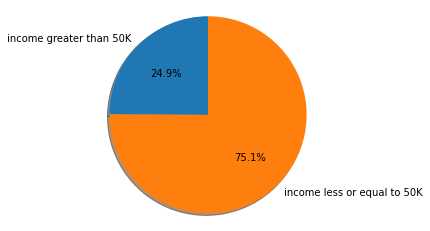

In [ ]:
g50 = len(np.where((temp[:,14] == '1'))[0])
l50 = len(np.where((temp[:,14] == '0'))[0])
income_prop = [g50,l50]
labels = ["income greater than 50K", "income less or equal to 50K"]
fig1, ax1 = plt.subplots()
ax1.pie(income_prop, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()


## Distribution of Working Hour
As is demonstrated in the histogram, people working about 35 hours a week occupy a dominaiting proportion, weighing over 50% of the whole sample. This may indicate discretization practices.

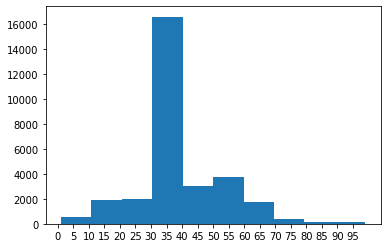

In [ ]:
wh_distr = x_train[:,12].astype(np.int)
plt.hist(wh_distr,bins = 10);
plt.xticks(np.arange(0, 100, step = 5));


## Gender Structure
As the plot indicates, male are more hopeful to have a salary more than 50K, ratio being 30% versus female's 10%.

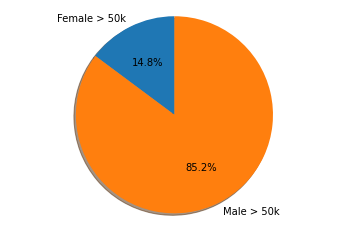

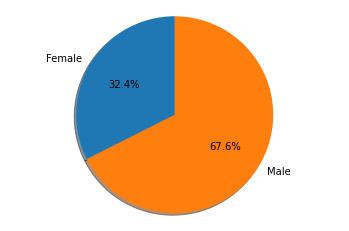

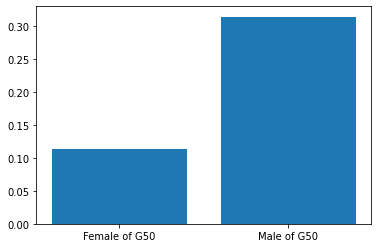

The ratio of female of male with income more than 50K


In [ ]:
g50_male = len(np.where((temp[:,9] == ' Male') & (temp[:,14] == '1'))[0])
g50_female = len(np.where((temp[:,9] == ' Female') & (temp[:,14] == '1'))[0])
male = len(np.where((temp[:,9] == ' Male'))[0])
female = len(np.where((temp[:,9] == ' Female'))[0])

size_pool = [[g50_female, g50_male],[female, male]]
label_pool = [['Female > 50k', 'Male > 50k'],['Female', 'Male']]
for i in range(0,2):

  sizes = size_pool[i]
  labels = label_pool[i]
  fig1, ax1 = plt.subplots()
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
          shadow=True, startangle=90)
  ax1.axis('equal')
  plt.show()

data = [g50_female/female, g50_male/male]
labels = ['Female of G50', 'Male of G50']

plt.bar(range(len(data)), data, tick_label=labels)
plt.show()
print("The ratio of female of male with income more than 50K")

##Education 
We briefly exam the correlation between people's education levels and their income by computing the ratio of people who earns greater than 50K for each education status, which are listed below, with education level from low too high. The results is intuitive: people who receive higher education tend to earn more money.

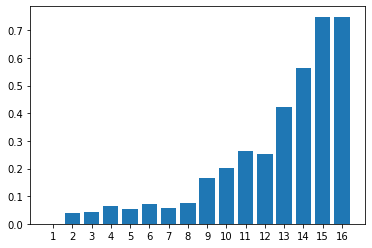

In [ ]:
#counting the ratio for each education level
edu_status = []
for i in range(1,17):
  total = len(np.where(temp[:,4] == " " + str(i))[0])
  g50 = len(np.where((temp[:,4] == " " + str(i)) & (temp[:,14] == '1'))[0])
  e_rate = g50/total
  edu_status.append(e_rate)

labels = []
for i in range(1,17):
  labels.append(str(i))

plt.bar(range(len(edu_status)), edu_status, tick_label=labels)
xlocs, xlabs = plt.xticks()
plt.show()

## Different Region
An intuitive thought on different countries is that those are geographically adjacent share similar cultural backgrounds and national conditions, therefore we think it worth a try to categorize them.<br></br>
As an example, ratio of people who earns greater than 50k are depicted in scatter points.


Ratio of people earning more than 50K, different countries.





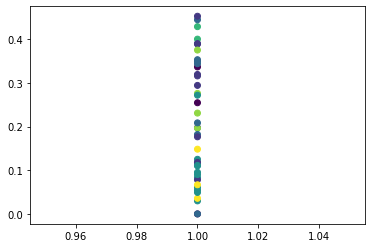

             The distribution of all countries.




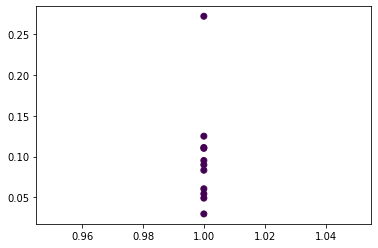

             The distribution of all Central America.




In [ ]:
country_list = (' United-States', ' Cambodia', ' England', ' Puerto-Rico', ' Canada', ' Germany', ' Outlying-US', ' India', ' Japan', ' Greece', ' South', ' China', ' Cuba', ' Iran', ' Honduras', ' Philippines', ' Italy', ' Poland', ' Jamaica', ' Vietnam', ' Mexico', ' Portugal', ' Ireland', ' France', ' Dominican-Republic', ' Laos', ' Ecuador', ' Taiwan', ' Haiti', ' Columbia', ' Hungary', ' Guatemala', ' Nicaragua', ' Scotland', ' Thailand', ' Yugoslavia', ' El-Salvador', ' Trinadad&Tobago', ' Peru', ' Hong', ' Holand-Netherlands')
label = np.array([])
n = 0
for country in country_list: 
  country_G = len(np.where((temp[:,13] == country) & (temp[:,14] == '1'))[0])
  country_t = len(np.where((temp[:,13] == country))[0])
  if (country_t == 0):
    label = np.append(label,0)
  else: 
    label = np.append(label,country_G/country_t)
  n = n+1
x = np.ones(41)
colors = np.array([1,2,3,4,1,3,1,5,2,6,2,2,4,5,4,2,3,6,4,2,4,3,3,3,4,2,7,2,4,7,6,4,4,3,2,6,4,4,7,2,3])

print(colored("Ratio of people earning more than 50K, different countries.\n\n\n","yellow"))
plt.scatter(x, label, c=colors);
plt.show()
print("             The distribution of all countries.\n\n")

#plot scatter points for Central America.
central_america = [i for i, x in enumerate(colors) if x == 4]
plt.scatter(x[central_america],label[central_america], c = colors[central_america])
plt.show()
print("             The distribution of all Central America.\n\n")


#Further Idea of data preprocessing

##encode workclass to continuous variable
People of different workclass earn, by intuition, different levels of salaries. Therefore, instead of one hot encoding which may eliminate such relation of salary level, we attempt to encode them in a sequential manner, assigning continuous values to each workclass separately. To figure out the values, we exam the training sample to calculate the ratio of those who earn more than 50K to the whole community of that workclass.

In [ ]:
wc_table = {}
wc_category = [' Private', ' Self-emp-not-inc', ' Self-emp-inc', ' Federal-gov', ' Local-gov', ' State-gov', ' Without-pay']

#workclass_salary_counting, counting the frequency of each workclass being over 50K
#   receive training set and name of workclass,
#   returning the corresponding frequency
def workclass_salary_counting(dataset, workclass):
    g50 = (len(np.where((dataset[:,1] == workclass) & (dataset[:,14] == ' >50K'))[0]))
    total = len(np.where(dataset[:,1] == workclass)[0])
    return (g50/total)

#workclass_rate, a lambda function used to proceed workclass, encoding it to the ratio we calculated.
def workclass_rate(workclass_box):
    workclass = workclass_box[0]
    return [wc_table[workclass]]

# build wc_table
for i, value in enumerate(wc_category):
    wc_table[value] = int(round(100000 * workclass_salary_counting(temp, value),0))

#another version of data preprocessing which encodes occupation into weighted value
x_train_continuous=x_train[:,[0,4,10,11,12]]
x_train_continuous = x_train_continuous.astype(np.int32)
x_train_discrete_onehot=x_train[:,[3,5,6,7,8,9,13]]
x_train_occu = x_train[:,[1]]
x_train_occu_pro = np.array(list(map(workclass_rate,x_train_occu)))
onehot=OneHotEncoder(handle_unknown='ignore')
onehot.fit(x_train_discrete_onehot)
onehot_xtrain_discrete=onehot.transform(x_train_discrete_onehot).toarray()
x_train_knninput=np.concatenate((x_train_continuous,onehot_xtrain_discrete.astype(np.int32),x_train_occu_pro),axis=1)

x_test_continuous = x_test[:,[0,4,10,11,12]]
x_test_continuous = x_test_continuous.astype(np.int32)
x_test_discrete_onehot=x_test[:,[3,5,6,7,8,9,13]]
x_test_occu = x_test[:,[1]]
x_test_occu_pro = np.array(list(map(workclass_rate,x_test_occu)))
onehot_xtest_discrete=onehot.transform(x_test_discrete_onehot).toarray()
x_test_knninput=np.concatenate((x_test_continuous,onehot_xtest_discrete.astype(np.int32),x_test_occu_pro),axis=1)


#Categorize country into several regions
From previous observations, we deem it a worthy try to categorize countries into regions to prevent overfitting. The implementation is as follows.

In [ ]:
#predefine abbreviation for regions
def NA():
    return ' North-America'
def EA():
    return ' East-Asia'
def WE():
    return ' West-Europe'
def CA():
    return ' Central-America'
def WA():
    return ' West-Asia'
def EE():
    return ' East-Europe'
def SA():
    return ' South-America'

#region_classifier receive country name as input and convert in to corresponding region.
def region_classifier(country):
    switcher = {
        ' United-States': NA(),
        ' Cambodia': EA(),
        ' England': WE(),
        ' Puerto-Rico': CA(),
        ' Canada': NA(),
        ' Germany': WE(),
        ' Outlying-US': NA(),
        ' India': WA(),
        ' Japan': EA(),
        ' Greece': EE(),
        ' South': EA(),
        ' China': EA(),
        ' Cuba': CA(),
        ' Iran': WA(),
        ' Honduras': CA(),
        ' Philippines': EA(),
        ' Italy': WE(),
        ' Poland': EE(),
        ' Jamaica': CA(),
        ' Vietnam': EA(),
        ' Mexico': CA(),
        ' Portugal': WE(),
        ' Ireland': WE(),
        ' France': WE(),
        ' Dominican-Republic': CA(),
        ' Laos': EA(),
        ' Ecuador': SA(),
        ' Taiwan': EA(),
        ' Haiti': CA(),
        ' Columbia': SA(),
        ' Hungary': EE(),
        ' Guatemala': CA(),
        ' Nicaragua': CA(),
        ' Scotland': WE(),
        ' Thailand': EA(),
        ' Yugoslavia': EE(),
        ' El-Salvador': CA(),
        ' Trinadad&Tobago': CA(),
        ' Peru': SA(),
        ' Hong': EA(),
        ' Holand-Netherlands': WE(),
    }
    return [switcher.get(country[0], "nothing")]

# another version of data processing, in which countries of same region would be classified.
x_train_continuous=x_train[:,[0,2,4,10,11,12]]
x_train_continuous = x_train_continuous.astype(np.int32)
x_train_discrete_onehot = x_train[:,[1,3,5,6,7,8,9]]
x_train_discrete_sequence = x_train[:,[13]]
x_train_discrete_sequence_pro = np.array(list(map(region_classifier,x_train_discrete_sequence)))
x_train_onehot = np.concatenate((x_train_discrete_onehot,x_train_discrete_sequence_pro), axis = 1)
onehot.fit(x_train_onehot)
onehot_xtrain_discrete=onehot.transform(x_train_onehot).toarray()
x_train_knninput=np.concatenate((x_train_continuous,onehot_xtrain_discrete.astype(np.int32)),axis=1)
x_test_continuous=x_test[:,[0,2,4,10,11,12]]
x_test_continuous = x_test_continuous.astype(np.int32)
x_test_discrete_onehot = x_test[:,[1,3,5,6,7,8,9]]
x_test_discrete_sequence = x_test[:,[13]]
x_test_discrete_sequence_pro = np.array(list(map(region_classifier,x_test_discrete_sequence)))
x_test_onehot = np.concatenate((x_test_discrete_onehot,x_test_discrete_sequence_pro), axis = 1)
onehot_xtest_discrete=onehot.transform(x_test_onehot).toarray()
x_test_knninput=np.concatenate((x_test_continuous,onehot_xtest_discrete.astype(np.int32)),axis=1)

## Encoding education levels


In [ ]:
# one hot encoding of training data
x_train_discrete=x_train[:,[1,5,6,7,8,9,13]]
x_train_continuous=x_train[:,[0,4,10,11,12]]
x_train_continuous = x_train_continuous.astype(np.int32)
x_train_continuous = x_train_continuous.astype(np.int32)
onehot_adult=OneHotEncoder(handle_unknown='ignore')
onehot_adult.fit(x_train_discrete)
onehot_xtrain_discrete=onehot_adult.transform(x_train_discrete).toarray()
# one hot encoding of testing data
x_test_discrete=x_test[:,[1,5,6,7,8,9,13]]
x_test_continuous=x_test[:,[0,4,10,11,12]]
x_test_continuous = x_test_continuous.astype(np.int32)
x_test_continuous = x_test_continuous.astype(np.int32)
onehot_xtest_discrete=onehot_adult.transform(x_test_discrete).toarray()

x_train_knninput=np.concatenate((x_train_continuous,onehot_xtrain_discrete.astype(np.int32)),axis=1)
x_test_knninput=np.concatenate((x_test_continuous,onehot_xtest_discrete.astype(np.int32)),axis=1)

#KNN Demonstration

Throughout the demonstration, KNN metrics would be by default, Minkowski.

## Validation error analysis

We iterated 1 to 10 on K and performed a cross validation on each to determine the hyperparameter. The fold number is set to 5 in demonstration, with metric being accuracy of predicting people of earning more than 50K.
As can be seen, the accuracy is highest when K = 18, the accuracy of which being 0.7871578.

**Cross Validation Fucntion Implementation**

In [ ]:
# calculate cross validation
# input: x -- training data features
#        y -- training data labels
#        n_fold -- number of subsets
#        model -- model instance
# output : mean of accuracy, error rate, precision, recall of the cross validation
def cross_validation(x,y,n_fold,model):
    cv_y_accuracy = np.array([])
    cv_y_error_rate = np.array([])
    cv_y_precision =np.array([])
    cv_y_recall = np.array([])
    cv_y_f1score = np.array([])
    n=x.shape[0] # data size
    n_val=n//n_fold # subset size

    for i in range(n_fold):
        train_index = []
        # calculate the validation set range
        validation_index = list(range(i * n_val, (i + 1) * n_val))
        # calculate the training set range
        if i > 0:
            train_index = list(range(i * n_val))
        if i < n - 1:
            train_index = train_index + list(range((i + 1) * n_val, n))
        # transform lists to numpy arrays to ease calculation
        train_index=np.array(train_index)
        validation_index=np.array(validation_index)
        # calculate y_predict
        cv_y_predict=model.fit(x[train_index.astype(np.int32),:],y[train_index.astype(np.int32)]).predict(x[validation_index,:])
        # calculate y_test
        cv_y_test = y[validation_index.astype(np.int32)]

        # TP -- y_predict is 1 and y_test is 1
        true_positive = np.sum((cv_y_predict==cv_y_test)&(cv_y_predict==1))
        # TN -- y_predict is 0 and y_test is 0
        true_negative = np.sum((cv_y_predict==cv_y_test)&(cv_y_predict==0))
        # FP -- y_predict is 1  and y_test is 0
        false_positive = np.sum((cv_y_predict!=cv_y_test)&(cv_y_predict==1))
        # FN -- y_predict is 0 and y_test is 1
        false_negative = np.sum((cv_y_predict!=cv_y_test)&(cv_y_predict==0))
        # P -- TP+FN
        positive = true_positive+false_negative
        # N -- FP+TN
        negative = false_positive+true_negative
        # RP -- TP+FP
        real_positive = true_positive+false_positive
        # RN -- TN+FN
        real_negative = true_negative + false_negative
        # calculate the accuracy and put the result into the corresponding array
        # Accuracy = (TP+TN)/(P+N)
        cv_y_accuracy=np.append(cv_y_accuracy,np.sum(cv_y_predict==cv_y_test)/cv_y_test.shape[0])

        # calculate the error rate and put the result into the corresponding array
        # Error rate = (FP+FN)/(P+N)
        cv_y_error_rate = np.append(cv_y_error_rate, (false_positive + false_negative) / (positive + negative))
        
        if(real_positive==0 or true_positive==0 or positive==0):
          # In case of max_depth=1, the real positive of DT is 0
          # It causes errors when it is a denominator
          cv_y_precision=np.append(cv_y_precision,0)
          cv_y_recall=np.append(cv_y_recall,0)
          cv_y_f1score = np.append(cv_y_f1score,0)
        else:
         
          
          # calculate the precision and put the result into the corresponding array
          # Precision = TP/RP
          cv_y_precision = np.append(cv_y_precision, true_positive / real_positive)

          # calculate the recall and put the result into the corresponding array
          # Recall = TP/P
          cv_y_recall = np.append(cv_y_recall, true_positive/positive)

          # calculate the f1score and put the result into the corresponding array
          # F1score = 2 * (Precision * Recall) / (Precision + Recall)
          cv_y_f1score = np.append(cv_y_f1score, 2 * ((true_positive / real_positive) * (true_positive/positive)) / ((true_positive / real_positive) + (true_positive/positive)))

    return np.mean(cv_y_accuracy),np.mean(cv_y_error_rate),np.mean(cv_y_precision),np.mean(cv_y_recall),np.mean(cv_y_f1score), np.std(cv_y_accuracy)

**Cross Validation of KNN**


Adult

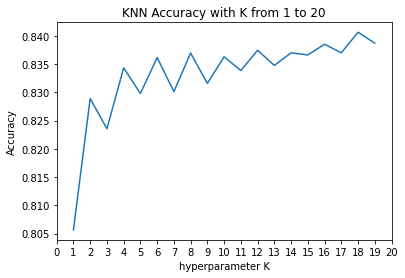

The standard deviation of K = 18 is  0.07770384709397118


In [ ]:
validation_accuracy = [[],[],[]]

for i in range(1, 20):
  knn = KNeighborsClassifier(i)
  a, b, c, d, e, std= cross_validation(x_train_knninput, y_train, 5, knn)
  validation_accuracy[0].append(i)
  validation_accuracy[1].append(a)
  validation_accuracy[2].append(std)

#visualization
plt.title("KNN Accuracy with K from 1 to 20");
plt.plot(validation_accuracy[0],validation_accuracy[1]);
plt.xlabel("hyperparameter K")
plt.ylabel("Accuracy")
plt.xticks(np.arange(0, 21, step=1));
plt.show();

print("The standard deviation of K = 18 is ",validation_accuracy[2][17])


Nursery


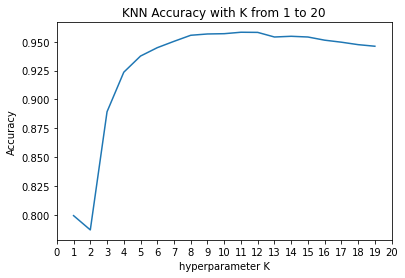

The standard deviation of K = 18 is  0.0051082041854256105


In [ ]:
validation_accuracy = [[],[],[]]

for i in range(1, 20):
  knn = KNeighborsClassifier(i)
  a, b, c, d, e, std= cross_validation(x_train_knninput2, y_train2, 5, knn)
  validation_accuracy[0].append(i)
  validation_accuracy[1].append(a)
  validation_accuracy[2].append(std)

#visualization
plt.title("KNN Accuracy with K from 1 to 20");
plt.plot(validation_accuracy[0],validation_accuracy[1]);
plt.xlabel("hyperparameter K")
plt.ylabel("Accuracy")
plt.xticks(np.arange(0, 21, step=1));
plt.show();

print("The standard deviation of K = 18 is ",validation_accuracy[2][17])

## Variation of training size 
We exam how the data size would impact the fitting results by altering training and validation size.<br></br>
The training error of KNN would still be 0. Yet as can be easily seen from the figure, the model performs way more outstanding on smaller training size, which indicates an overfitting.<br></br>
Although the curve in relation to accuracy of different K remains similar pattern, the fiercing zigzag influence our choice of the hyperparameter.


Adult

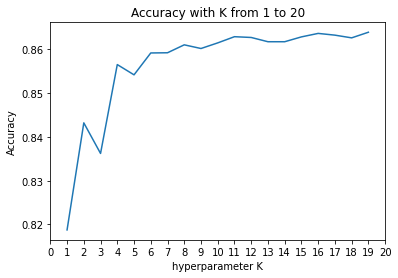

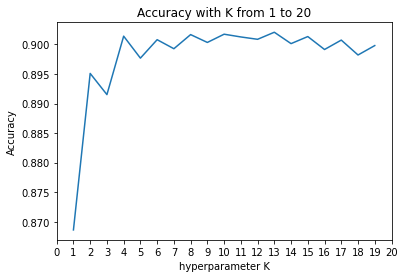

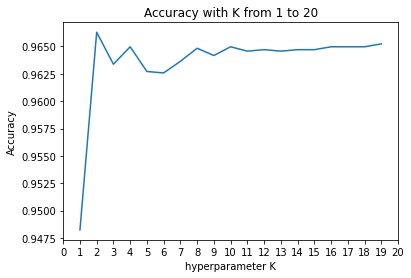

In [ ]:
size_coef = {3/4,1/2,1/4}

for size in size_coef:
  x_train_knninput_1 = x_train_knninput[:(int(round(size * np.size(x_train_knninput,0)))),:]
  y_train_1 = y_train[:int(round(size * np.size(y_train)))]
  validation_accuracy = [[],[],[]]

  for i in range(1, 20):
    knn = KNeighborsClassifier(i)
    a, b, c, d, e, std= cross_validation(x_train_knninput_1, y_train_1, 5, knn)
    validation_accuracy[0].append(i)
    validation_accuracy[1].append(a)
    validation_accuracy[2].append(std)
    
  #visualization
  plt.title("Accuracy with K from 1 to 20");
  plt.plot(validation_accuracy[0],validation_accuracy[1]);
  plt.xlabel("hyperparameter K")
  plt.ylabel("Accuracy")
  plt.xticks(np.arange(0, 21, step=1));
  plt.show();

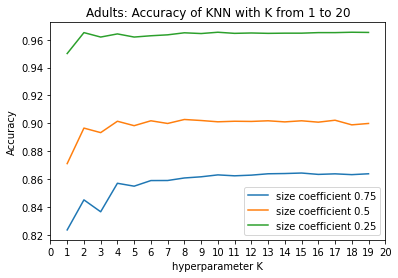

In [ ]:
#integrated version
size_coef = {3/4,1/2,1/4}

combined_lines = []
for size in size_coef:
  x_train_knninput_1 = x_train_knninput[:(int(round(size * np.size(x_train_knninput,0)))),:]
  y_train_1 = y_train[:int(round(size * np.size(y_train)))]
  validation_accuracy = [[],[],[]]

  for i in range(1, 20):
    knn = KNeighborsClassifier(i)
    a, b, c, d, e, std= cross_validation(x_train_knninput_1, y_train_1, 5, knn)
    validation_accuracy[0].append(i)
    validation_accuracy[1].append(a)
    validation_accuracy[2].append(std)
  
  combined_lines.append(validation_accuracy)


#visualization
plt.title("Adult: Accuracy of KNN with K from 1 to 20");
plt.plot(combined_lines[0][0],combined_lines[0][1],label = "size coefficient 0.75");
plt.plot(combined_lines[1][0], combined_lines[1][1], label = 'size coefficient 0.5');
plt.plot(combined_lines[2][0], combined_lines[2][1], label = 'size coefficient 0.25');

plt.xlabel("hyperparameter K")
plt.ylabel("Accuracy")
plt.xticks(np.arange(0, 21, step=1));
plt.legend()
plt.show();

Nursery

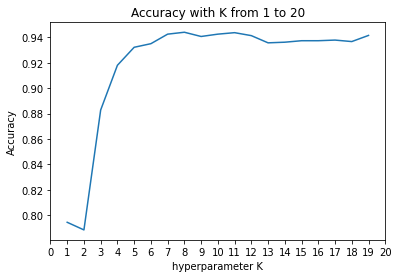

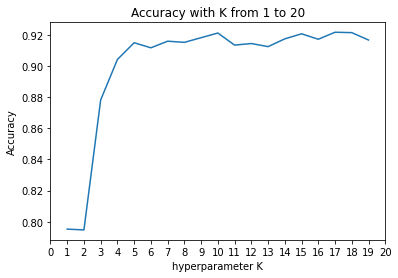

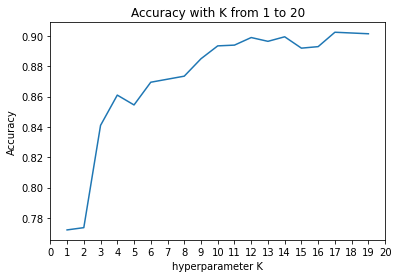

In [ ]:
size_coef = {3/4,1/2,1/4}

for size in size_coef:
  x_train_knninput_1 = x_train_knninput2[:(int(round(size * np.size(x_train_knninput2,0)))),:]
  y_train_1 = y_train2[:int(round(size * np.size(y_train2)))]
  validation_accuracy = [[],[],[]]

  for i in range(1, 20):
    knn = KNeighborsClassifier(i)
    a, b, c, d, e, std= cross_validation(x_train_knninput_1, y_train_1, 5, knn)
    validation_accuracy[0].append(i)
    validation_accuracy[1].append(a)
    validation_accuracy[2].append(std)
    
  #visualization
  plt.title("Accuracy with K from 1 to 20");
  plt.plot(validation_accuracy[0],validation_accuracy[1]);
  plt.xlabel("hyperparameter K")
  plt.ylabel("Accuracy")
  plt.xticks(np.arange(0, 21, step=1));
  plt.show();

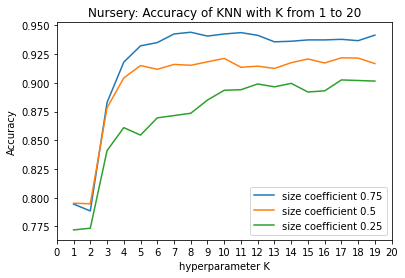

In [ ]:
#integrated version
size_coef = {3/4,1/2,1/4}

combined_lines = []
for size in size_coef:
  x_train_knninput_1 = x_train_knninput2[:(int(round(size * np.size(x_train_knninput2,0)))),:]
  y_train_1 = y_train2[:int(round(size * np.size(y_train2)))]
  validation_accuracy = [[],[],[]]

  for i in range(1, 20):
    knn = KNeighborsClassifier(i)
    a, b, c, d, e, std= cross_validation(x_train_knninput_1, y_train_1, 5, knn)
    validation_accuracy[0].append(i)
    validation_accuracy[1].append(a)
    validation_accuracy[2].append(std)
  
  combined_lines.append(validation_accuracy)


#visualization
plt.title("Nursery: Accuracy of KNN with K from 1 to 20");
plt.plot(combined_lines[0][0], combined_lines[0][1],label = "size coefficient 0.75");
plt.plot(combined_lines[1][0], combined_lines[1][1], label = 'size coefficient 0.5');
plt.plot(combined_lines[2][0], combined_lines[2][1], label = 'size coefficient 0.25');

plt.xlabel("hyperparameter K")
plt.ylabel("Accuracy")
plt.xticks(np.arange(0, 21, step=1));
plt.legend()
plt.show();

## Running Test


In [ ]:
#running_test      accepting model name and a group of parametres for sklear model
#            print the test results,
def running_test(model, *args):
  if model == "knn":
    classifier = KNeighborsClassifier(args[0])
    plt.title("K-Nearest Neigbour, K: "+str(args[0]))
  elif model == "DT":
    classifier = DecisionTreeClassifier(random_state = args[0], max_depth = args[1])
    plt.title("Decision Tree: maximum depth: "+str(args[1]))
  else: print("Illegal model name.")

  classifier.fit(x_train_knninput,y_train)

  test_prediction = classifier.predict(x_test_knninput)

  true_positive = np.sum((test_prediction == y_test) & (y_test == 1))
  true_negative = np.sum((test_prediction == y_test) & (y_test == 0))
  false_negative = np.sum((test_prediction != y_test) & (test_prediction == 0))
  false_positive = np.sum((test_prediction != y_test) & (test_prediction == 1))
  positive = true_positive + false_negative
  negative = true_negative + false_negative

  accuracy = (true_negative + true_positive) / (positive + negative)
  error_rate = 1 - accuracy
  precision = true_positive / (true_positive + false_positive)
  recall = true_positive / (positive)
  F1Score = 2 * (precision * recall) / (precision + recall)
  
  
  data = [accuracy, error_rate, precision, recall, F1Score]
  labels = ['accuracy', 'error_rate','precision','recall', 'F1Score']
  

  plt.bar(range(len(data)), data, tick_label=labels)
  xlocs, xlabs = plt.xticks()
  for i, v in enumerate(data):
    plt.text(xlocs[i] - 0.25, v + 0.01, str(round(v,3)))
  plt.show()


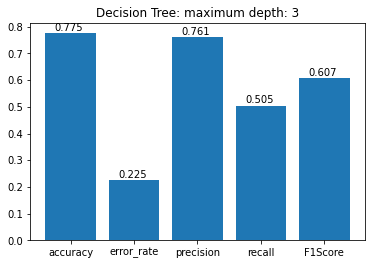

In [ ]:
running_test("DT",0,3)

#Decision Tree Demonstration

##Validation error analysis

For decision tree, we pick 0 for random states and integers from 1 to 10 for max depths.

Adult

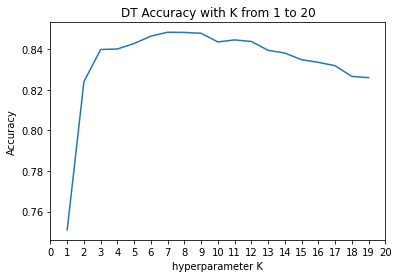

In [ ]:
validation_accuracy = [[],[],[]]

for i in range(1, 20):
  dt = DecisionTreeClassifier(max_depth=i, random_state=0)
  a, b, c, d, e, std= cross_validation(x_train_knninput, y_train, 5, dt)
  validation_accuracy[0].append(i)
  validation_accuracy[1].append(a)
  validation_accuracy[2].append(std)

#visualization
plt.title("DT Accuracy with K from 1 to 20");
plt.plot(validation_accuracy[0],validation_accuracy[1]);
plt.xlabel("hyperparameter K")
plt.ylabel("Accuracy")
plt.xticks(np.arange(0, 21, step=1));
plt.show();

Nursery

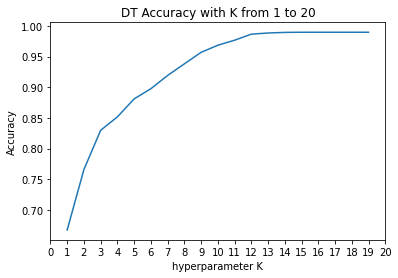

The standard deviation of K = 18 is  0.0017940875118009191


In [ ]:
validation_accuracy = [[],[],[]]

for i in range(1, 20):
  dt = DecisionTreeClassifier(max_depth=i, random_state=0)
  a, b, c, d, e, std= cross_validation(x_train_knninput2, y_train2, 5, dt)
  validation_accuracy[0].append(i)
  validation_accuracy[1].append(a)
  validation_accuracy[2].append(std)

#visualization
plt.title("DT Accuracy with K from 1 to 20");
plt.plot(validation_accuracy[0],validation_accuracy[1]);
plt.xlabel("hyperparameter K")
plt.ylabel("Accuracy")
plt.xticks(np.arange(0, 21, step=1));
plt.show();

print("The standard deviation of K = 18 is ",validation_accuracy[2][17])

##Variation of training size


Adult


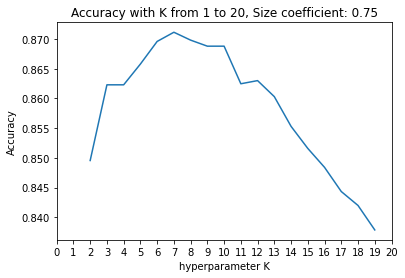

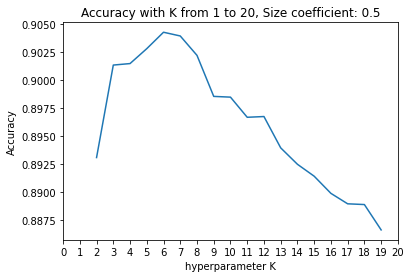

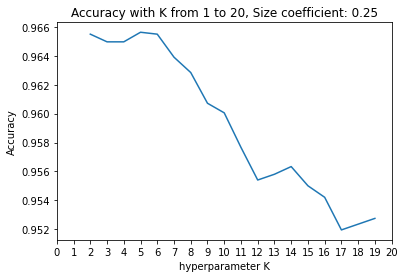

In [ ]:
size_coef = {3/4,1/2,1/4}
combined_lines = []

for size in size_coef:
  x_train_knninput_1 = x_train_knninput[:(int(round(size * np.size(x_train_knninput,0)))),:]
  y_train_1 = y_train[:int(round(size * np.size(y_train)))]
  validation_accuracy = [[],[],[]]

  for i in range(2, 20):
    dt = DecisionTreeClassifier(max_depth=i, random_state=0)
    a, b, c, d, e, std= cross_validation(x_train_knninput_1, y_train_1, 5, dt)
    validation_accuracy[0].append(i)
    validation_accuracy[1].append(a)
    validation_accuracy[2].append(std)

  combined_lines.append(validation_accuracy)
  
#visualization


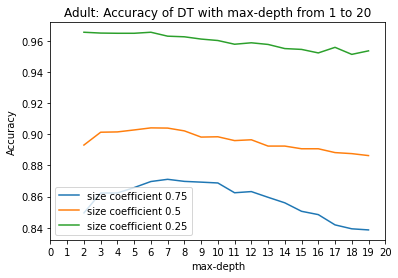

In [ ]:
#integrated version
size_coef = {3/4,1/2,1/4}
combined_lines = []

for size in size_coef:
  x_train_knninput_1 = x_train_knninput[:(int(round(size * np.size(x_train_knninput,0)))),:]
  y_train_1 = y_train[:int(round(size * np.size(y_train)))]
  validation_accuracy = [[],[],[]]

  for i in range(2, 20):
    dt = DecisionTreeClassifier(max_depth=i, random_state=0)
    a, b, c, d, e, std= cross_validation(x_train_knninput_1, y_train_1, 5, dt)
    validation_accuracy[0].append(i)
    validation_accuracy[1].append(a)
    validation_accuracy[2].append(std)
  
  combined_lines.append(validation_accuracy)

#visualization
plt.title("Adult: Accuracy of DT with max-depth from 1 to 20");
plt.plot(combined_lines[0][0], combined_lines[0][1],label = "size coefficient 0.75");
plt.plot(combined_lines[1][0], combined_lines[1][1], label = 'size coefficient 0.5');
plt.plot(combined_lines[2][0], combined_lines[2][1], label = 'size coefficient 0.25');

plt.xlabel("max-depth")
plt.ylabel("Accuracy")
plt.xticks(np.arange(0, 21, step=1));
plt.legend()
plt.show();

Nursery

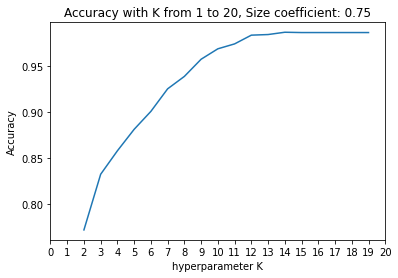

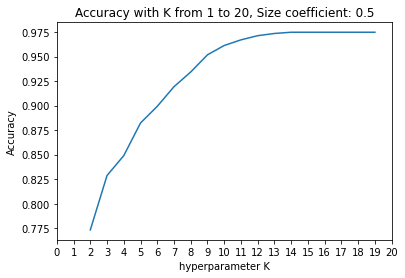

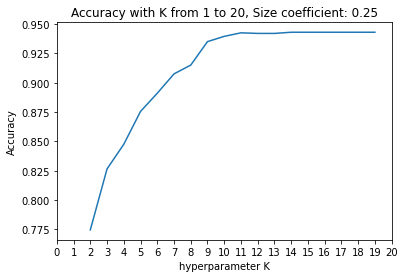

In [ ]:
size_coef = {3/4,1/2,1/4}
for size in size_coef:
  x_train_knninput_1 = x_train_knninput2[:(int(round(size * np.size(x_train_knninput2,0)))),:]
  y_train_1 = y_train2[:int(round(size * np.size(y_train2)))]
  validation_accuracy = [[],[],[]]

  for i in range(2, 20):
    dt = DecisionTreeClassifier(max_depth=i, random_state=0)
    a, b, c, d, e, std= cross_validation(x_train_knninput_1, y_train_1, 5, dt)
    validation_accuracy[0].append(i)
    validation_accuracy[1].append(a)
    validation_accuracy[2].append(std)

  #visualization
  title="Accuracy with K from 1 to 20, Size coefficient: "+str(size)
  plt.title(title);
  plt.plot(validation_accuracy[0],validation_accuracy[1]);
  plt.xlabel("hyperparameter K")
  plt.ylabel("Accuracy")
  plt.xticks(np.arange(0, 21, step=1));
  plt.show();

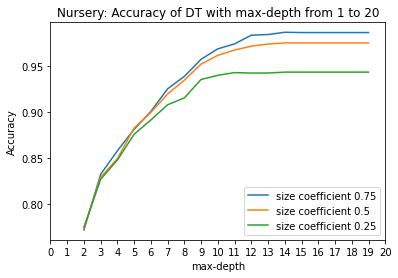

In [ ]:
#integrated version
size_coef = {3/4,1/2,1/4}
combined_lines = []

for size in size_coef:
  x_train_knninput_1 = x_train_knninput2[:(int(round(size * np.size(x_train_knninput2,0)))),:]
  y_train_1 = y_train2[:int(round(size * np.size(y_train2)))]
  validation_accuracy = [[],[],[]]

  for i in range(2, 20):
    dt = DecisionTreeClassifier(max_depth=i, random_state=0)
    a, b, c, d, e, std= cross_validation(x_train_knninput_1, y_train_1, 5, dt)
    validation_accuracy[0].append(i)
    validation_accuracy[1].append(a)
    validation_accuracy[2].append(std)

  combined_lines.append(validation_accuracy)

plt.title("Nursery: Accuracy of DT with max-depth from 1 to 20");
plt.plot(combined_lines[0][0], combined_lines[0][1],label = "size coefficient 0.75");
plt.plot(combined_lines[1][0], combined_lines[1][1], label = 'size coefficient 0.5');
plt.plot(combined_lines[2][0], combined_lines[2][1], label = 'size coefficient 0.25');

plt.xlabel("max-depth")
plt.ylabel("Accuracy")
plt.xticks(np.arange(0, 21, step=1));
plt.legend()
plt.show();

##Running Test

Adult

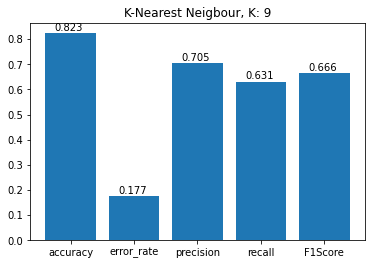

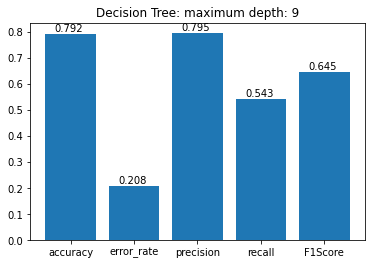

In [ ]:
running_test("knn",9,0)
running_test("DT",0,9)

Nursery


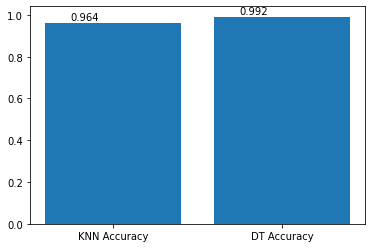

In [ ]:

knn=KNeighborsClassifier(11)
knn.fit(x_train_knninput2,y_train2)
y_predict=knn.predict(x_test_knninput2)
accuracy1=np.sum(y_predict==y_test2)/y_predict.shape[0]


dt = DecisionTreeClassifier(max_depth=13, random_state=0)
dt.fit(x_train_knninput2,y_train2)
y_predict=dt.predict(x_test_knninput2)
accuracy2=np.sum(y_predict==y_test2)/y_predict.shape[0]


data = [accuracy1, accuracy2]
labels = ['KNN Accuracy','DT Accuracy']
  

plt.bar(range(len(data)), data, tick_label=labels)
xlocs, xlabs = plt.xticks()
for i,v in enumerate(data):
  plt.text(xlocs[i] - 0.25, v + 0.01, str(round(v,3)))

plt.show()